In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

In [2]:
df=pd.read_csv('Week7_train.csv')

In [3]:
df.shape

(42000, 785)

In [5]:
df_sampled=df.sample(frac=0.1,random_state=42)
df_sampled.shape

(4200, 785)

In [6]:
df_sampled.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
5457       8       0       0       0       0       0       0       0       0   
38509      1       0       0       0       0       0       0       0       0   
25536      9       0       0       0       0       0       0       0       0   
31803      9       0       0       0       0       0       0       0       0   
39863      8       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
16041      4       0       0       0       0       0       0       0       0   
4867       2       0       0       0       0       0       0       0       0   
28123      7       0       0       0       0       0       0       0       0   
3780       7       0       0       0       0       0       0       0       0   
7155       5       0       0       0       0       0       0       0       0   

       pi

In [7]:
unique_labels=df_sampled.iloc[:,0].nunique()
unique_labels

10

In [9]:
df_sampled.iloc[:,0].value_counts()

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [11]:
df_sampled['label'].value_counts()

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [14]:
x=df_sampled.drop(columns='label')
y=df_sampled['label']

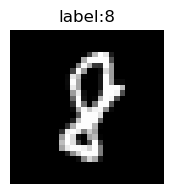

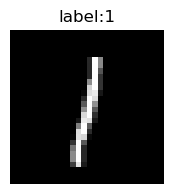

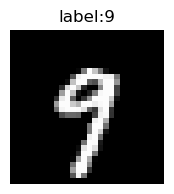

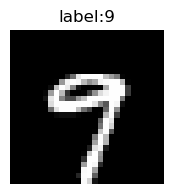

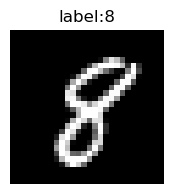

In [15]:
for i in range(5):
    image=x.iloc[i].values.reshape(28,28)
    label=y.iloc[i]
    plt.figure(figsize=(2,2))
    plt.imshow(image,cmap='gray')
    plt.title(f'label:{label}')
    plt.axis('off')
    plt.show()

In [16]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [19]:
y_pred=knn.predict(x_test)
y_pred[:10]

array([9, 3, 6, 7, 5, 1, 8, 1, 1, 5])

In [20]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 97,   0,   0,   1,   0,   1,   2,   0,   0,   0],
       [  0, 118,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,  81,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   1, 122,   0,   4,   0,   1,   1,   3],
       [  0,   0,   0,   0,  88,   0,   2,   0,   0,   5],
       [  0,   1,   0,   2,   0,  80,   1,   1,   0,   0],
       [  0,   1,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   9,   1,   0,   0,   0,   0, 104,   0,   4],
       [  0,   5,   1,   3,   0,   1,   2,   2,  89,   3],
       [  1,   2,   0,   1,   3,   0,   0,   5,   0,  94]])

In [21]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050

0.9247619047619048


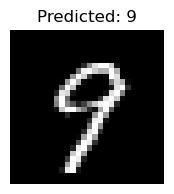

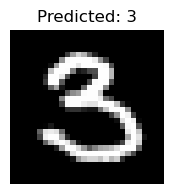

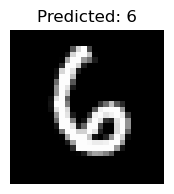

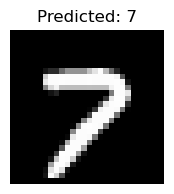

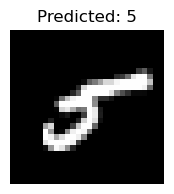

In [22]:
for i in range(5):
    image = x_test.iloc[i].values.reshape(28, 28)  # Reshape to 28x28 if it's MNIST-style
    predicted_label = y_pred[i]
    
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

